<a href="https://colab.research.google.com/github/AmirMoazzami/207_final_project/blob/Soroush/W207_FinalProject_SoroushYazdani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Datasets

In [17]:
url='https://raw.githubusercontent.com/AmirMoazzami/207_final_project/main/sample_submission.csv'
sample = pd.read_csv(url)
url_train='https://raw.githubusercontent.com/AmirMoazzami/207_final_project/Soroush/train.csv'
url_test='https://raw.githubusercontent.com/AmirMoazzami/207_final_project/Soroush/test.csv'
X_train = pd.read_csv(url_train)
X_test = pd.read_csv(url_test)

In [18]:
columns_train = X_train.columns
columns_train[1:-2]
cols=['id','sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed', 'muscle_pain',
       'joint_pain', 'vomiting', 'rash', 'diarrhea', 'hypotension',
       'pleural_effusion', 'ascites', 'gastro_bleeding', 'swelling', 'nausea',
       'chills', 'myalgia', 'digestion_trouble', 'fatigue', 'skin_lesions',
       'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain',
       'weight_loss', 'gum_bleed', 'jaundice', 'coma', 'diziness',
       'inflammation', 'red_eyes', 'loss_of_appetite', 'urination_loss',
       'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin',
       'yellow_eyes', 'facial_distortion', 'microcephaly', 'rigor',
       'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine',
       'hypoglycemia', 'prostraction', 'hyperpyrexia', 'stiff_neck',
       'irritability', 'confusion', 'tremor', 'paralysis', 'lymph_swells',
       'breathing_restriction', 'toe_inflammation', 'finger_inflammation',
       'lips_irritation', 'itchiness', 'ulcers', 'toenail_loss',
       'speech_problem','bullseye_rash',	'prognosis']


In [22]:
display(X_test)

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,1006,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,1007,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
301,1008,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature correlations

I need to do a better job plotting the data

              sudden_fever  headache  vomiting  diarrhea    ulcers
sudden_fever      1.000000  0.124397  0.062081  0.127716 -0.252493
headache          0.124397  1.000000  0.187048  0.092428 -0.104211
vomiting          0.062081  0.187048  1.000000  0.042047 -0.121710
diarrhea          0.127716  0.092428  0.042047  1.000000 -0.155290
ulcers           -0.252493 -0.104211 -0.121710 -0.155290  1.000000


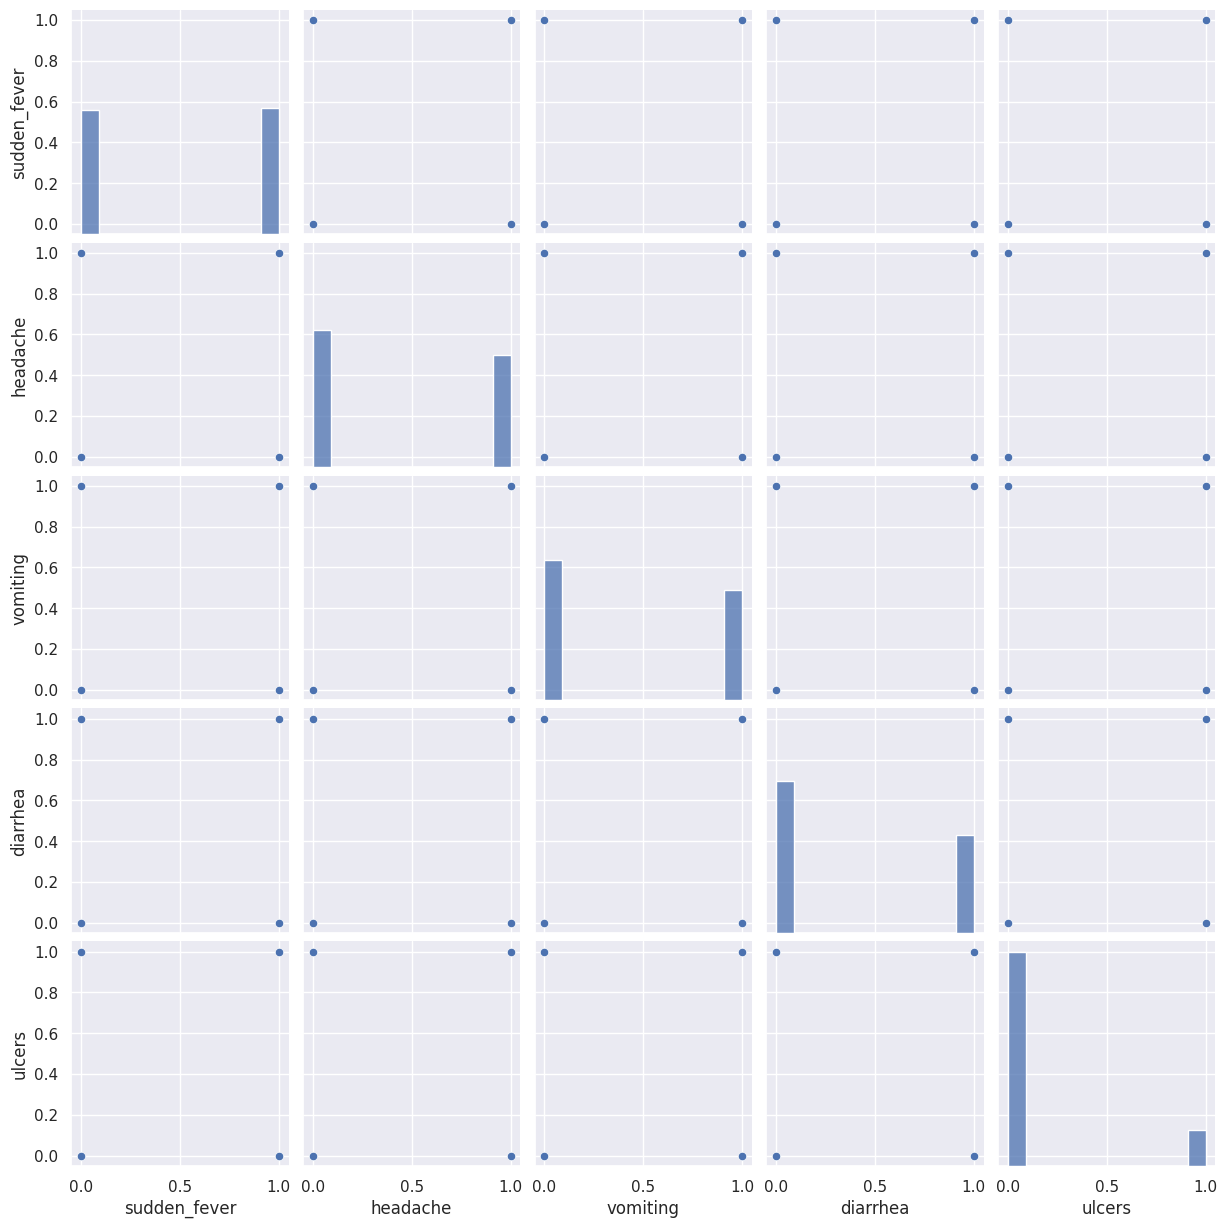

In [31]:
# calculating the correlation of the train data
print(X_train.corr())
# examine each pair of features using sns.paiplot
sns.pairplot(X_train)

In [23]:
# Choose a subset of columns (these are all numeric).
columns = ['sudden_fever', 'headache', 'vomiting', 'diarrhea', 'ulcers']
features = columns
X_train = X_train[columns]
X_test = X_test[columns]

# Convert strings to numeric values, coercing missing values to nan.
for column in columns:
  X_test[column] = pd.to_numeric(X_test[column], errors='coerce')
  X_test = X_test[columns]
  X_train[column] = pd.to_numeric(X_train[column], errors='coerce')
  X_train = X_train[columns]

# The dropna function drops rows with missing value(s) by default.
X_train = X_train.dropna()
X_test = X_test.dropna()

# This leaves us with 199 examples.
display(X_train)

<ipython-input-23-94e3b9a8a755>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = pd.to_numeric(X_test[column], errors='coerce')
<ipython-input-23-94e3b9a8a755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = pd.to_numeric(X_train[column], errors='coerce')


,sudden_fever,headache,vomiting,diarrhea,ulcers
0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
702,0.0,0.0,0.0,0.0,0.0
703,1.0,0.0,0.0,1.0,0.0
704,1.0,0.0,0.0,1.0,0.0
705,1.0,1.0,1.0,1.0,0.0


In [28]:
# We want to shuffle the order of the rows without touching the columns.
# First, we get a list of indices corresponding to the rows.
indices = np.arange(X_train.shape[0])
print('indices:', indices, '\n')

# Next, we shuffle the indices using np.random.permutation but set a random seed
# so that everyone gets the same results each time.
np.random.seed(0)
shuffled_indices = np.random.permutation(indices)
print('shuffled indices:', shuffled_indices, '\n')

# Finally, we use dataframe.reindex to change the ordering of the original
# dataframe.
X_train = X_train.reindex(shuffled_indices)
X_test = X_test.reindex(shuffled_indices)
display(X_train)

indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 2

,sudden_fever,headache,vomiting,diarrhea,ulcers
317,1.0,1.0,0.0,1.0,0.0
443,1.0,0.0,1.0,1.0,1.0
187,1.0,0.0,1.0,1.0,0.0
353,0.0,0.0,0.0,0.0,0.0
570,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...
359,0.0,0.0,0.0,0.0,0.0
192,1.0,1.0,0.0,1.0,0.0
629,1.0,1.0,0.0,0.0,0.0
559,0.0,0.0,1.0,0.0,0.0


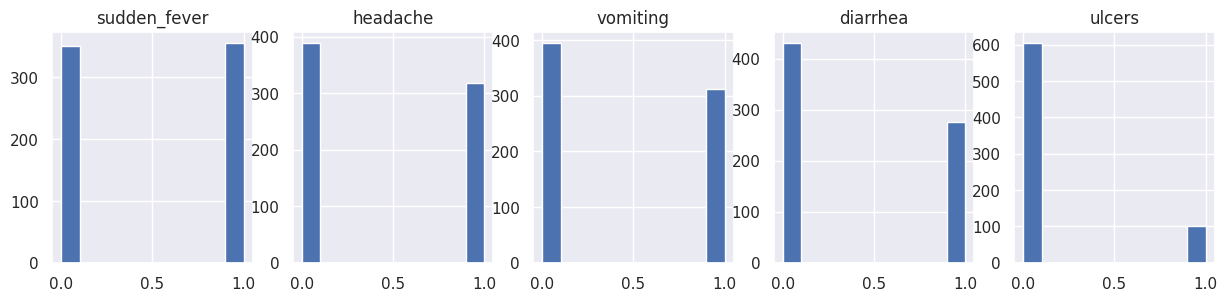

,sudden_fever,headache,vomiting,diarrhea,ulcers
count,707.000000,707.000000,707.000000,707.000000,707.000000
mean,0.503536,0.449788,0.441301,0.390382,0.144272
std,0.500341,0.497825,0.496894,0.488181,0.351614
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# plottig feoture histograms
plt.figure(figsize=(15, 3))
for i in range(len(columns)):
  plt.subplot(1, 5, i+1)
  plt.hist(np.array(X_train[columns[i]]))
  plt.title(columns[i])
plt.show()
# looking at the describe function
display(X_train.describe())

###Baseline


We can use either max value (which is 1) or mean for our baseline. I am not sure if using mean would help us but I put it here for now. <span style="color:chocolate"> We need to do this: </span>

1. Use max for baseline
2. Use mean for baseline.

## Build a Model

I just brought something here for now to build the model. I am still working on this section.

In [32]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  #model = NotImplemented

  model = Sequential()

  # Flatten input data
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  #model.add(Flatten(input_shape=(28, 28)))

  # Hidden layers
  for units in hidden_layer_sizes:
      model.add(Dense(units, activation=activation))

  # Output layer
  model.add(Dense(n_classes, activation='softmax'))

  # Compile the model
  if optimizer == 'SGD':
      optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  elif optimizer == 'Adam':
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Print the model summary
  model.summary()

  return model